# Y a-t-il des différences selon l'âge et le genre dans la manière d'apprécier l'expérience de rêver ?

**Author** : Laetitia Carli

**Date** : June 2025

## 1. Library import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import networkx as nx
from statsmodels.miscmodels.ordinal_model import OrderedModel
import colorsys

## 2. Directed acyclic graph

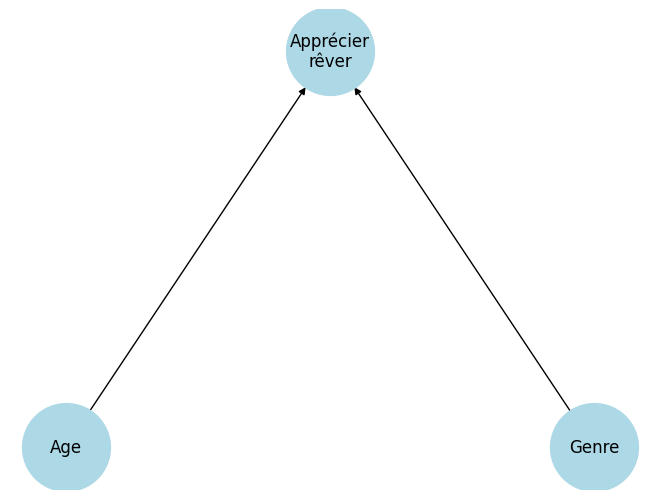

In [2]:
G = nx.DiGraph()

nodes = ['Age', 'Genre','Apprécier\nrêver']
G.add_nodes_from(nodes)

edges = [('Age', 'Apprécier\nrêver'), ('Genre', 'Apprécier\nrêver')]
G.add_edges_from(edges)

pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels = True, node_size = 4000, node_color ='lightblue', arrows = True, font_size = 12)
plt.show()

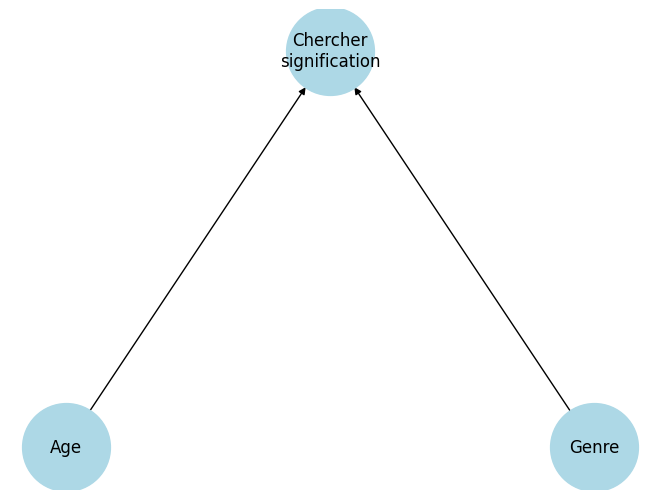

In [3]:
G = nx.DiGraph()

nodes = ['Age', 'Genre','Chercher\nsignification']
G.add_nodes_from(nodes)

edges = [('Age', 'Chercher\nsignification'), ('Genre', 'Chercher\nsignification')]
G.add_edges_from(edges)

pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels = True, node_size = 4000, node_color ='lightblue', arrows = True, font_size = 12)
plt.show()

## 3. Data import 

In [4]:
df = pd.read_csv("questionnaire_dataset.csv", encoding='utf-8')
df

Horodateur Âge (en chiffre) Genre   \
0    04/06/2025 16:15:10               19  Femme   
1    04/06/2025 17:16:08               18  Femme   
2    04/06/2025 17:53:57               19  Femme   
3    12/06/2025 13:59:40               16  Femme   
4    12/06/2025 13:59:55               20  Femme   
..                   ...              ...    ...   
251  17/06/2025 08:18:48               17  Homme   
252  17/06/2025 09:37:34               20  Femme   
253  17/06/2025 10:19:54               21  Femme   
254  18/06/2025 13:13:12               19  Femme   
255  18/06/2025 23:03:37               47  Femme   

    À quelle fréquence avez-vous des sentiments de déjà-vu ?   \
0                                              Souvent          
1                                         Très souvent          
2                                              Souvent          
3                                             Rarement          
4                                              Souvent          
..                                                 ...          
251                                       Très souvent          
252                                           Rarement          
253                                            Souvent          
254                                           Rarement          
255                                            Souvent          

    A quelle fréquence faites-vous des cauchemars ?  \
0                                    Je ne sais pas   
1                                          Rarement   
2                                          Rarement   
3                                          Rarement   
4                                          Rarement   
..                                              ...   
251                                        Rarement   
252                                        Rarement   
253                                         Souvent   
254                                        Rarement   
255                                        Rarement   

    Les rêves sont une expérience que j'apprécie.   \
0                                           Neutre   
1                                         D'accord   
2                                         D'accord   
3                                         D'accord   
4                              Totalement d'accord   
..                                             ...   
251                                         Neutre   
252                                       D'accord   
253                                       D'accord   
254                                       D'accord   
255                                       D'accord   

    Rêvez-vous en couleur ou en noir et blanc ?  \
0                                Je ne sais pas   
1                                    En couleur   
2                                    En couleur   
3                                    En couleur   
4                                    En couleur   
..                                          ...   
251                                    Les deux   
252                                         NaN   
253                                  En couleur   
254                                  En couleur   
255                                  En couleur   

    Mes rêves ont déjà influencé mes actions.  \
0                                    D'accord   
1                                      Neutre   
2                                    D'accord   
3                                Pas d'accord   
4                         Totalement d'accord   
..                                        ...   
251                                  D'accord   
252                                    Neutre   
253                                  D'accord   
254                                  D'accord   
255                                  D'accord   

    Je me souviens souvent de mes rêves.  \
0                   Pas du tout d'accord   
1       

## 4. Data manipulation

### 4.1 Rename columns

In [5]:
df = df.rename(columns={'Âge (en chiffre)': 'Age'})

In [6]:
df = df.rename(columns={'Genre ': 'Genre'})

In [7]:
df = df.rename(columns={'Les rêves sont une expérience que j\'apprécie. ': 'Appreciation'})

In [8]:
df = df.rename(columns={'Je cherche la signification de mes rêves. ': 'Signification'})

### 4.2 Select and clean the data

In [9]:
age_dict = {"20 ans" : 20,
       "55 ans" : 55,
       "soixante deux ans" : 62,
       "18 ans": 18
              }
df['Age'] = df['Age'].astype(str).str.strip().str.lower()
df.loc[:, 'Age'] = df['Age'].replace(age_dict)


In [10]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  

In [11]:
df = df[df['Genre'].isin(["Femme", "Homme"])]

## 5. Data description

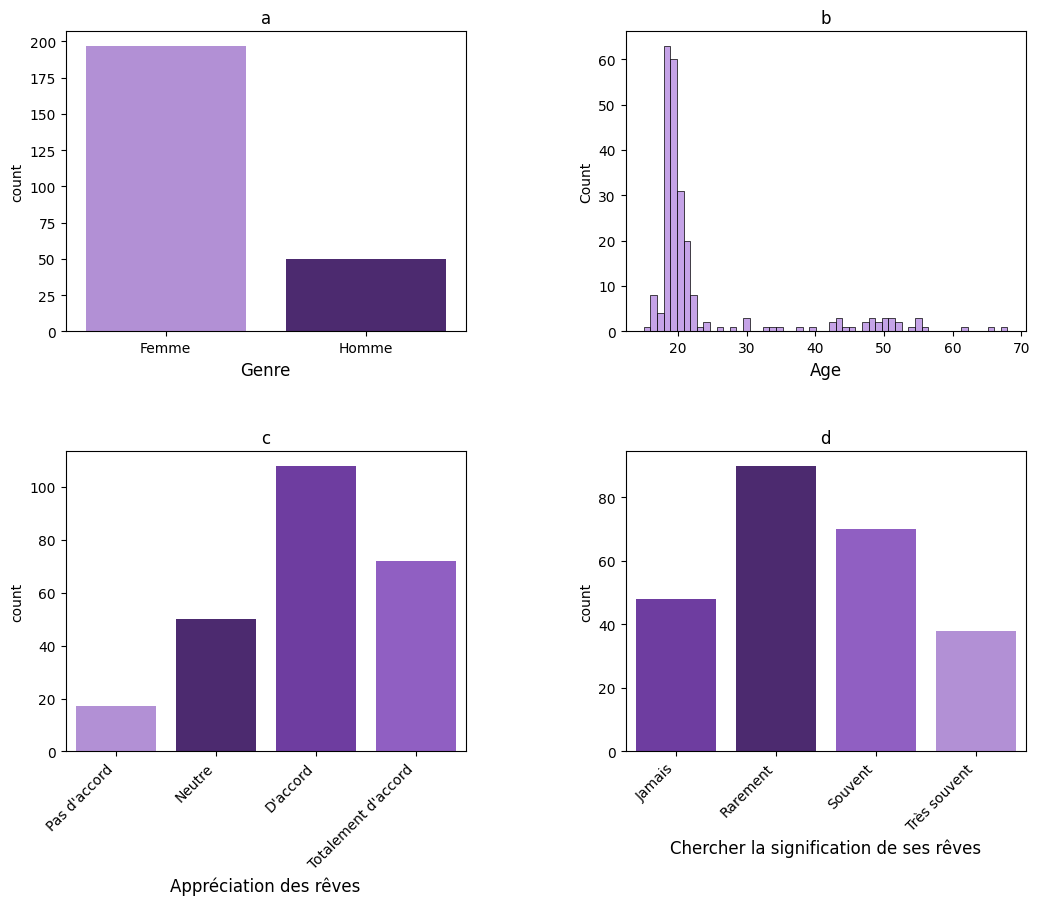

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12, 9))

def purple_gradient(n_colors, light_min=0.3, light_max=0.7):
    h = 0.75
    s = 0.6
    lightness = np.linspace(light_max, light_min, n_colors)
    colors = [colorsys.hls_to_rgb(h, l, s) for l in lightness]
    return colors

n_genre = df['Genre'].nunique()
palette_genre = purple_gradient(n_genre)

sns.countplot(x='Genre', hue='Genre', data=df, ax=axs[0, 0], palette=palette_genre, legend=False)
axs[0, 0].set_xlabel("Genre", fontsize=12)
axs[0, 0].set_title("a")

sns.histplot(x=df['Age'], ax=axs[0, 1], color=purple_gradient(1)[0])
axs[0, 1].set_xlabel("Age", fontsize=12)
axs[0, 1].set_title("b")

appreciation_order = ["Pas d'accord", "Neutre", "D'accord", "Totalement d'accord"]
palette_appreciation = purple_gradient(len(appreciation_order))

sns.countplot(x='Appreciation', hue='Appreciation', data=df, order=appreciation_order,
    ax=axs[1, 0], palette=palette_appreciation[::-1], legend=False)
for tick in axs[1, 0].get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')
axs[1, 0].set_xlabel("Appréciation des rêves", fontsize=12)
axs[1, 0].set_title("c")

signification_order = ["Jamais", "Rarement", "Souvent", "Très souvent"]
palette_signification = purple_gradient(len(signification_order))

sns.countplot(x='Signification', hue='Signification', data=df, order=signification_order,
    ax=axs[1, 1], palette=palette_signification[::-1], legend=False)
for tick in axs[1, 1].get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')
axs[1, 1].set_xlabel("Chercher la signification de ses rêves", fontsize=12)
axs[1, 1].set_title("d")

plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.show()

## 6. Data modelling

In [13]:
df.dropna(subset = ['Age', 'Genre', 'Appreciation', 'Signification'], inplace=True)

In [14]:
pd.set_option('future.no_silent_downcasting', True)
df['Appreciation'] = df['Appreciation'].astype(str).str.strip().str.lower()
appreciation_dict = {"pas d'accord" : 1,
                     "neutre" : 2,
                     "d'accord" : 3,
                     "totalement d'accord": 4
                    }
df.loc[:,'Appreciation'] = df['Appreciation'].replace(appreciation_dict)
df['Appreciation'] = df['Appreciation'].astype('Int64')

In [15]:
model = smf.ols(formula = 'Appreciation ~ Age + Genre', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Appreciation   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9304
Date:                Thu, 19 Jun 2025   Prob (F-statistic):              0.396
Time:                        09:02:10   Log-Likelihood:                -305.54
No. Observations:                 237   AIC:                             617.1
Df Residuals:                     234   BIC:                             627.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.9858      0.138     21.584      0.000       2.713       3.258
Genre[T.Homme]     0.1767      0.142      1.245      0.214      -0.103       0.456
Age               -0.0033      0.005     -0.623      0.534      -0.014       0.007
==============================================================================
Omnibus:                       13.133   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.776
Skew:                          -0.561   Prob(JB):                      0.00102
Kurtosis:                       2.634   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
signification_dict = {"Jamais" : 1,
                     "Rarement" : 2,
                     "Souvent" : 3,
                     "Très souvent": 4
                    }
df.loc[:,'Signification'] = df['Signification'].replace(signification_dict)
df['Signification'] = df['Signification'].astype('Int64')

In [17]:
model = smf.ols(formula = 'Signification ~ Age + Genre', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Signification   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     3.287
Date:                Thu, 19 Jun 2025   Prob (F-statistic):             0.0391
Time:                        09:02:10   Log-Likelihood:                -326.59
No. Observations:                 237   AIC:                             659.2
Df Residuals:                     234   BIC:                             669.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.6669      0.151     17.641      0.000       2.369       2.965
Genre[T.Homme]    -0.3018      0.155     -1.945      0.053      -0.607       0.004
Age               -0.0090      0.006     -1.566      0.119      -0.020       0.002
==============================================================================
Omnibus:                       28.523   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.271
Skew:                           0.243   Prob(JB):                      0.00588
Kurtosis:                       2.103   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
df['Genre'] = df['Genre'].astype(str).str.strip().str.lower()
df.loc[:, 'man_encoded'] = df['Genre'].astype('category').cat.codes

In [19]:
y = df["Signification"]
X = df[["Age", "man_encoded"]]  

model = OrderedModel(y, X, distr='logit')  
result = model.fit(method='bfgs')


result.summary()

Optimization terminated successfully.
         Current function value: 1.319338
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          Signification   Log-Likelihood:                -312.68
Model:                   OrderedModel   AIC:                             635.4
Method:            Maximum Likelihood   BIC:                             652.7
Date:                Thu, 19 Jun 2025                                         
Time:                        09:02:11                                         
No. Observations:                 237                                         
Df Residuals:                     232                                         
Df Model:                           2                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0185      0.012     -1.584      0.113      -0.041       0.004
man_encoded    -0.6314      0.304     -2.077      0.038      -1.227      -0.036
1/2            -1.9739      0.328     -6.026      0.000      -2.616      -1.332
2/3             0.5329      0.096      5.559      0.000       0.345       0.721
3/4             0.3615      0.114      3.183      0.001       0.139       0.584
===============================================================================
"""